In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [84]:
# Get data
train_data = pd.read_csv('data/train_cleaned.csv')
test_data = pd.read_csv('data/test_cleaned.csv')
val_data = pd.read_csv('data/validation_cleaned.csv')

In [85]:
train_data.head()

,vin,back_legroom (in),body_type,num_of_cylinders,exterior_color_grouped,front_legroom (in),fuel_tank_volume (gallon),fuel_type,horsepower,interior_color_grouped,...,seller_rating,torque (rpm),transmission,wheel_system,wheelbase (in),year,actual_price,dealer_region,volume,combined_fuel_economy
0,JTEZU5JR8L5224867,32.9,suv,6.0,blue,41.7,23.0,gasoline,270.0,black,...,5 star,4400.0,automatic,4x2,109.8,2020,43497.0,South,337.5,35.000000
1,19UUB2F47LA006167,34.5,sedan,6.0,white,42.6,17.2,gasoline,290.0,white,...,5 star,4500.0,automatic,fwd,109.3,2020,41125.0,South,320.7,51.000000
2,WBA5U7C08LA232243,35.2,sedan,6.0,white,42.0,15.6,gasoline,382.0,black,...,5 star,1800.0,automatic,rwd,112.2,2020,49260.0,South,323.5,52.000000
3,WBA5R1C57KAK11439,35.2,sedan,4.0,silver,42.0,15.6,gasoline,255.0,black,...,5 star,1450.0,automatic,rwd,112.2,2019,37204.0,West,323.9,62.000000
4,JF2SJAGC1JH590936,38.0,suv,4.0,silver,43.0,15.9,gasoline,170.0,black,...,3 star,4100.0,cvt,awd,103.9,2018,25411.0,Northeast,330.2,58.164986


In [86]:
X_train = train_data.drop('actual_price', axis=1)
y_train = train_data['actual_price']
X_test = test_data.drop('actual_price', axis=1)
y_test = test_data['actual_price']
X_val = val_data.drop('actual_price', axis=1)
y_val = val_data['actual_price']

In [87]:
print(X_train.shape, X_test.shape, X_val.shape)

(271232, 22) (84761, 22) (67809, 22)


In [88]:
X_train.columns

Index(['vin', 'back_legroom (in)', 'body_type', 'num_of_cylinders',
       'exterior_color_grouped', 'front_legroom (in)',
       'fuel_tank_volume (gallon)', 'fuel_type', 'horsepower',
       'interior_color_grouped', 'make_name', 'maximum_seating', 'mileage',
       'seller_rating', 'torque (rpm)', 'transmission', 'wheel_system',
       'wheelbase (in)', 'year', 'dealer_region', 'volume',
       'combined_fuel_economy'],
      dtype='object')

In [89]:
X_train.drop('vin', axis=1, inplace=True)
X_test.drop('vin', axis=1, inplace=True)
X_val.drop('vin', axis=1, inplace=True)

In [90]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271232 entries, 0 to 271231
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   back_legroom (in)          271232 non-null  float64
 1   body_type                  271232 non-null  object 
 2   num_of_cylinders           271232 non-null  float64
 3   exterior_color_grouped     271232 non-null  object 
 4   front_legroom (in)         271232 non-null  float64
 5   fuel_tank_volume (gallon)  271232 non-null  float64
 6   fuel_type                  271232 non-null  object 
 7   horsepower                 271232 non-null  float64
 8   interior_color_grouped     271232 non-null  object 
 9   make_name                  271232 non-null  object 
 10  maximum_seating            271232 non-null  float64
 11  mileage                    271232 non-null  object 
 12  seller_rating              271232 non-null  object 
 13  torque (rpm)               27

## Feature Engineering

In [91]:
col_list = ['body_type', 'exterior_color_grouped', 'interior_color_grouped', 'fuel_type', 'mileage', 'seller_rating', 'dealer_region',\
            'transmission', 'wheel_system']

one_hot_train = pd.get_dummies(X_train, columns=col_list, drop_first=True)
one_hot_val = pd.get_dummies(X_val, columns=col_list, drop_first=True)
one_hot_test = pd.get_dummies(X_test, columns=col_list, drop_first=True)

In [92]:
X_train, X_test = one_hot_train.align(one_hot_test, join='left', fill_value=0, axis=1)
X_train, X_val = one_hot_train.align(one_hot_val, join='left', fill_value=0, axis=1)

In [93]:
X_train.head()

,back_legroom (in),num_of_cylinders,front_legroom (in),fuel_tank_volume (gallon),horsepower,make_name,maximum_seating,torque (rpm),wheelbase (in),year,...,dealer_region_West,dealer_region_unknown,transmission_cvt,transmission_dual clutch,transmission_manual,wheel_system_4x2,wheel_system_awd,wheel_system_fwd,wheel_system_rwd,wheel_system_unknown
0,32.9,6.0,41.7,23.0,270.0,toyota,7.0,4400.0,109.8,2020,...,0,0,0,0,0,1,0,0,0,0
1,34.5,6.0,42.6,17.2,290.0,other,5.0,4500.0,109.3,2020,...,0,0,0,0,0,0,0,1,0,0
2,35.2,6.0,42.0,15.6,382.0,bmw,5.0,1800.0,112.2,2020,...,0,0,0,0,0,0,0,0,1,0
3,35.2,4.0,42.0,15.6,255.0,bmw,5.0,1450.0,112.2,2019,...,1,0,0,0,0,0,0,0,1,0
4,38.0,4.0,43.0,15.9,170.0,subaru,5.0,4100.0,103.9,2018,...,0,0,1,0,0,0,1,0,0,0


In [94]:
X_test.head()

,back_legroom (in),num_of_cylinders,front_legroom (in),fuel_tank_volume (gallon),horsepower,make_name,maximum_seating,torque (rpm),wheelbase (in),year,...,dealer_region_West,dealer_region_unknown,transmission_cvt,transmission_dual clutch,transmission_manual,wheel_system_4x2,wheel_system_awd,wheel_system_fwd,wheel_system_rwd,wheel_system_unknown
0,43.6,8.0,43.9,23.0,385.0,ford,6.0,2500.0,156.8,2017,...,0,0,0,0,0,0,0,0,0,0
1,34.6,8.0,45.3,36.0,360.0,chevrolet,6.0,4200.0,158.1,2019,...,0,0,0,0,0,1,0,0,0,0
2,37.8,4.0,41.0,14.5,203.0,toyota,5.0,4100.0,105.9,2020,...,0,0,0,0,0,0,1,0,0,0
3,36.1,4.0,45.0,18.0,182.0,nissan,5.0,4000.0,109.3,2016,...,0,0,1,0,0,0,0,1,0,0
4,39.1,4.0,40.9,14.2,164.0,kia,5.0,4000.0,101.2,2014,...,0,0,0,0,0,0,0,1,0,0


In [95]:
print(X_train.shape, X_val.shape, X_test.shape)

(271232, 58) (67809, 58) (84761, 58)


In [96]:
from category_encoders import TargetEncoder
def target_encode(train, test, val, col_list, target):
    target_enc = TargetEncoder(cols=col_list, return_df=True, min_samples_leaf=10, smoothing=5)
    target_fit = target_enc.fit(train, target)
    new_train = target_fit.transform(train)
    new_test = target_fit.transform(test)
    new_val = target_fit.transform(val)
    return new_train, new_test, new_val

In [97]:
col_list = ['make_name']
X_train, X_test, X_val = target_encode(X_train, X_test, X_val, col_list, y_train)

In [98]:
X_train.head()

,back_legroom (in),num_of_cylinders,front_legroom (in),fuel_tank_volume (gallon),horsepower,make_name,maximum_seating,torque (rpm),wheelbase (in),year,...,dealer_region_West,dealer_region_unknown,transmission_cvt,transmission_dual clutch,transmission_manual,wheel_system_4x2,wheel_system_awd,wheel_system_fwd,wheel_system_rwd,wheel_system_unknown
0,32.9,6.0,41.7,23.0,270.0,26914.790183,7.0,4400.0,109.8,2020,...,0,0,0,0,0,1,0,0,0,0
1,34.5,6.0,42.6,17.2,290.0,37575.163801,5.0,4500.0,109.3,2020,...,0,0,0,0,0,0,0,1,0,0
2,35.2,6.0,42.0,15.6,382.0,39922.939997,5.0,1800.0,112.2,2020,...,0,0,0,0,0,0,0,0,1,0
3,35.2,4.0,42.0,15.6,255.0,39922.939997,5.0,1450.0,112.2,2019,...,1,0,0,0,0,0,0,0,1,0
4,38.0,4.0,43.0,15.9,170.0,25482.486255,5.0,4100.0,103.9,2018,...,0,0,1,0,0,0,1,0,0,0


In [99]:
X_train.shape

(271232, 58)

In [100]:
X_train.columns

Index(['back_legroom (in)', 'num_of_cylinders', 'front_legroom (in)',
       'fuel_tank_volume (gallon)', 'horsepower', 'make_name',
       'maximum_seating', 'torque (rpm)', 'wheelbase (in)', 'year', 'volume',
       'combined_fuel_economy', 'body_type_coupe', 'body_type_hatchback',
       'body_type_minivan', 'body_type_pickup truck', 'body_type_sedan',
       'body_type_suv', 'body_type_van', 'body_type_wagon',
       'exterior_color_grouped_blue', 'exterior_color_grouped_gray',
       'exterior_color_grouped_other', 'exterior_color_grouped_red',
       'exterior_color_grouped_silver', 'exterior_color_grouped_white',
       'interior_color_grouped_brown', 'interior_color_grouped_gray',
       'interior_color_grouped_other', 'interior_color_grouped_white',
       'fuel_type_diesel', 'fuel_type_electric', 'fuel_type_flex fuel vehicle',
       'fuel_type_gasoline', 'fuel_type_hybrid', 'fuel_type_other',
       'mileage_100-150k', 'mileage_150-200k', 'mileage_50-100k',
       'mileage_>

In [101]:
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_val.reset_index(drop=True, inplace=True)
y_val.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

# Feature selection

## Backward Elimination

In [102]:
import statsmodels.api as sm

X_train_stat = sm.add_constant(X_train)

# Create a list of features
features = list(X_train_stat.columns)

max_p = np.inf

while len(features) > 30:
    # Fit a model using all of the features
    model = sm.OLS(y_train, X_train_stat[features]).fit()

    # Calculate the p-values for each feature
    p_values = model.pvalues
    max_p = p_values.max()
    
    print(p_values.idxmax(), max_p)
    
    if max_p < 0.10:
        break

    # Remove the feature with the highest p-value
    features.remove(p_values.idxmax())

# Fit a new model without the removed feature
print('\n')
print(model.summary())


fuel_type_hybrid 0.9964051140843573
fuel_type_other 0.931078743341195
seller_rating_5 star 0.7266657762080624
exterior_color_grouped_other 0.5285328480775142
mileage_unknown 0.412559631702343
wheel_system_awd 0.3251195794426631
dealer_region_unknown 0.1501527498255193
volume 0.0350612653797391


                            OLS Regression Results                            
Dep. Variable:           actual_price   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                 1.469e+04
Date:                Sat, 24 Jun 2023   Prob (F-statistic):               0.00
Time:                        17:18:51   Log-Likelihood:            -2.8386e+06
No. Observations:              271232   AIC:                         5.677e+06
Df Residuals:                  271180   BIC:                         5.678e+06
Df Model:                          51                                  

In [103]:
len(features)

52

In [104]:
features.remove('const')

In [105]:
X_train = X_train[features]
X_val = X_val[features]
X_test = X_test[features]

## Baseline Model

In [106]:
from sklearn.preprocessing import StandardScaler

X_train_stat = sm.add_constant(X_train)
X_val_stat = sm.add_constant(X_val)
X_test_stat = sm.add_constant(X_test)

model = sm.OLS(y_train, X_train_stat).fit()
y_pred = model.predict(X_val_stat)

from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_val, y_pred)
print('MAPE: ', mape)
accuracy = 100 - mape * 100
print('Accuracy: ', accuracy)

MAPE:  0.24166841019727317
Accuracy:  75.83315898027269


In [107]:
y_pred = model.predict(X_train_stat)
mape = mean_absolute_percentage_error(y_train, y_pred)
print('Traing MAPE: ', mape)
accuracy = 100 - mape * 100
print('Training Accuracy: ', accuracy)

Traing MAPE:  0.23215213871060617
Training Accuracy:  76.78478612893939


## Check for heteroscedasticity and linear relationship

In [108]:
# Plot residual vs fitted values
import math
studentized_residuals = model.get_influence().resid_studentized_internal
r = studentized_residuals
n = len(r)
deleted_studentized_residuals = pd.Series([r_i * math.sqrt((n-2-1)/(n-2-r_i**2)) for r_i in r])
fitted_y = model.fittedvalues

(-25.0, 25.0)

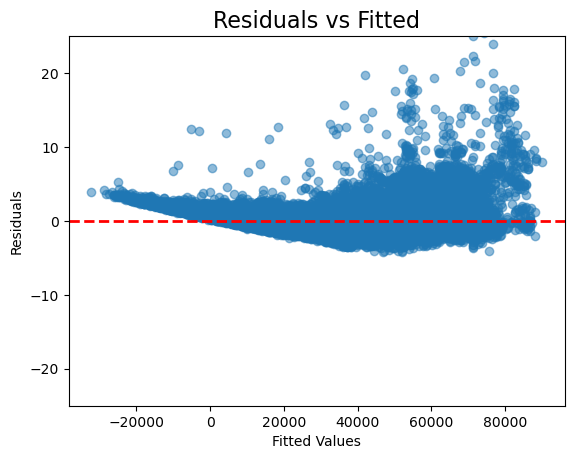

In [109]:
ax = sns.regplot(x=fitted_y, y=model.resid_pearson, fit_reg=False, scatter_kws={'alpha':0.5})
ax.set_title('Residuals vs Fitted', fontsize=16)
ax.set(xlabel='Fitted Values', ylabel='Residuals')
ax.axhline(y=0, color='r', linestyle='--', lw=2)
ax.set_ylim(-25, 25)

In [110]:
np.mean(deleted_studentized_residuals)

1.8167163707029768e-05

From the plot,  Moreover, there is a slight curvilinear relationship. So, the linear model may not be a good fit for the data. Moroeover, we observe a megaphone shaped pattern. Therefore, there may be some heteroscedasticity. To make sure, we will perform a statistical test for heteroscedasticity.

In [111]:
import scipy.stats as stats
fitted_y = model.fittedvalues
order_index = fitted_y.argsort()
sorted_residuals = model.resid[order_index]

# Create group for levene test
n = len(sorted_residuals)
k = 2
statistics, p_val = stats.levene(sorted_residuals[:n//k], sorted_residuals[n//k:], center='median')
print('statistic: ', statistics)

if p_val < 0.05:
    print('The variances are unequal, p-value: ', p_val)
else:
    print('The variances are homogeneous, p-value: ', p_val)


statistic:  16114.994100295593
The variances are unequal, p-value:  0.0


C:\Users\apurb\AppData\Local\Temp\ipykernel_22476\2955823005.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  statistics, p_val = stats.levene(sorted_residuals[:n//k], sorted_residuals[n//k:], center='median')


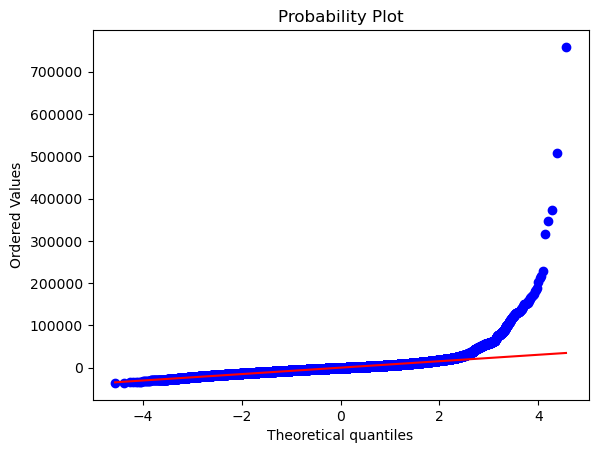

In [112]:
# create a q-q plot
import scipy.stats as stats
import pylab

stats.probplot(model.resid, dist="norm", plot=pylab)
pylab.show()

In [113]:
# check for normality of residuals
from scipy.stats import shapiro
stat, p = shapiro(model.resid)
print('Statistics=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

Statistics=0.805, p=0.000
Probably not Gaussian


c:\ProgramData\Anaconda3\envs\SIE533\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


It is clear that there is heteroscedasticity. Moreover, the normality assumption is also violated.

## Box-cox transformation and model refit

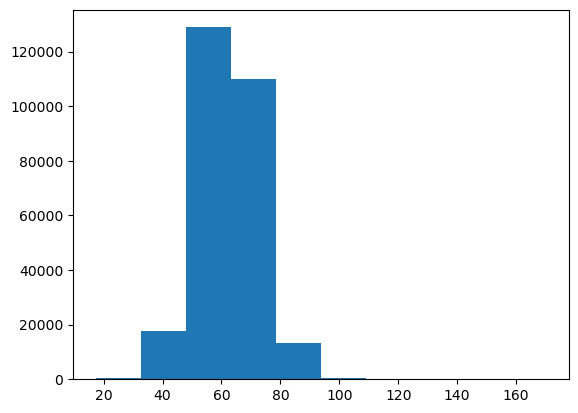

In [114]:
# perform box-cox transformation
from scipy.stats import boxcox

# transform training data & save lambda value
y_train_bc, lam = boxcox(y_train)

# plot transformed data
plt.hist(y_train_bc)
plt.show()

In [115]:
# train on transformed data
model = sm.OLS(y_train_bc, X_train_stat).fit()
y_pred = model.predict(X_val_stat)

# transform validation data
y_val_bc = boxcox(y_val, lam)

# evaluate model
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_val_bc, y_pred)
print('MAPE: ', mape)

accuracy = 100 - mape * 100
print('Accuracy: ', accuracy)

MAPE:  0.05362515696249117
Accuracy:  94.63748430375088


In [116]:
y_pred = model.predict(X_train_stat)

# evaluate model
mape = mean_absolute_percentage_error(y_train_bc, y_pred)
print('Train MAPE: ', mape)

accuracy = 100 - mape * 100
print('Train Accuracy: ', accuracy)

Train MAPE:  0.04683890730259401
Train Accuracy:  95.3161092697406


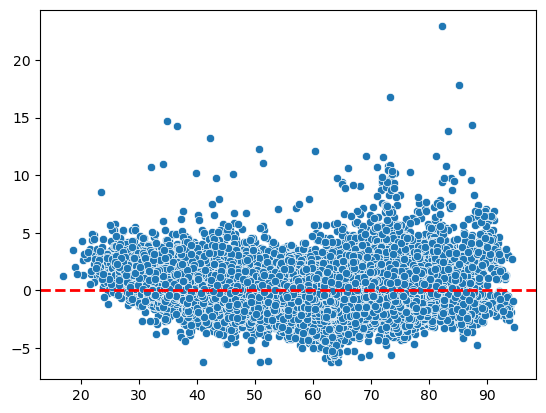

In [117]:
# Plot residual vs fitted values
studentized_residuals = model.get_influence().resid_studentized_internal
ax = sns.scatterplot(x=model.fittedvalues, y=studentized_residuals)
ax.axhline(y=0, color='r', linestyle='--', lw=2)

In [118]:
# Check for outliers
# Calculate the studentized deleted residuals
studentized_residuals = model.get_influence().resid_studentized_internal
r = studentized_residuals
n = len(r)
deleted_studentized_residuals = pd.Series([r_i * math.sqrt((n-2-1)/(n-2-r_i**2)) for r_i in r])
critical_value = stats.t.ppf(q=1-(.10/(2*n)), df=n-3-1)

# Identify the outliers
is_outlier = abs(deleted_studentized_residuals) > critical_value
outliers = deleted_studentized_residuals[abs(deleted_studentized_residuals) > critical_value].index
print(outliers)


Int64Index([  2011,   2362,   2801,   3277,   3532,   5444,   6272,   7633,
              7742,   8687,
            ...
            264585, 266599, 266876, 267754, 268085, 270248, 270514, 270746,
            271031, 271097],
           dtype='int64', length=283)


<AxesSubplot: >

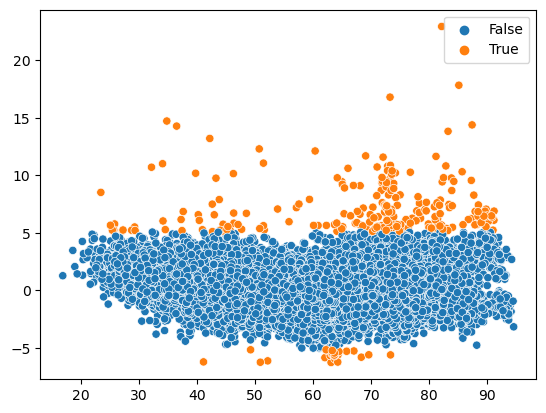

In [119]:
fitted_y = model.fittedvalues
sns.scatterplot(x=fitted_y, y=deleted_studentized_residuals, hue=is_outlier)

In [120]:
cook_distance, pvals = model.get_influence().cooks_distance
is_influential = pvals[outliers] > 0.5
influential_outliers = outliers[is_influential]
print(influential_outliers)

Int64Index([  2011,   2362,   2801,   3277,   3532,   5444,   6272,   7633,
              7742,   8687,
            ...
            264585, 266599, 266876, 267754, 268085, 270248, 270514, 270746,
            271031, 271097],
           dtype='int64', length=283)


<AxesSubplot: >

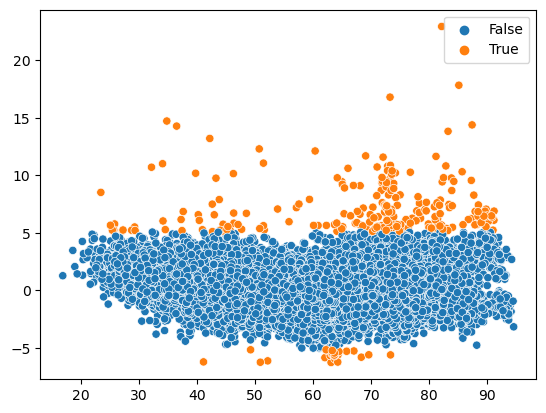

In [121]:
is_influential = pvals > 0.1
is_outlier_and_influential = is_outlier & is_influential
sns.scatterplot(x=fitted_y, y=deleted_studentized_residuals, hue=is_outlier_and_influential)

In [122]:
X_train_stat.head()

,const,back_legroom (in),num_of_cylinders,front_legroom (in),fuel_tank_volume (gallon),horsepower,make_name,maximum_seating,torque (rpm),wheelbase (in),...,dealer_region_Northeast,dealer_region_South,dealer_region_West,transmission_cvt,transmission_dual clutch,transmission_manual,wheel_system_4x2,wheel_system_fwd,wheel_system_rwd,wheel_system_unknown
0,1.0,32.9,6.0,41.7,23.0,270.0,26914.790183,7.0,4400.0,109.8,...,0,1,0,0,0,0,1,0,0,0
1,1.0,34.5,6.0,42.6,17.2,290.0,37575.163801,5.0,4500.0,109.3,...,0,1,0,0,0,0,0,1,0,0
2,1.0,35.2,6.0,42.0,15.6,382.0,39922.939997,5.0,1800.0,112.2,...,0,1,0,0,0,0,0,0,1,0
3,1.0,35.2,4.0,42.0,15.6,255.0,39922.939997,5.0,1450.0,112.2,...,0,0,1,0,0,0,0,0,1,0
4,1.0,38.0,4.0,43.0,15.9,170.0,25482.486255,5.0,4100.0,103.9,...,1,0,0,1,0,0,0,0,0,0


In [123]:
y_train_bc = pd.Series(y_train_bc)
y_train_bc.head()

0    71.232948
1    70.040012
2    73.949397
3    67.955618
4    60.551045
dtype: float64

In [124]:
# Remove the outliers
X_train_stat = X_train_stat.drop(influential_outliers, axis=0)
y_train_bc = y_train_bc.drop(influential_outliers)
X_train_stat.reset_index(drop=True, inplace=True)
y_train_bc.reset_index(drop=True, inplace=True)

In [125]:
## Refit the model
model = sm.OLS(y_train_bc, X_train_stat).fit()
y_pred = model.predict(X_val_stat)

y_val_bc = boxcox(y_val, lam)

from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_val_bc, y_pred)
print('MAPE: ', mape)
accuracy = 100 - mape * 100
print('Accuracy: ', accuracy)

MAPE:  0.05330428546160847
Accuracy:  94.66957145383915


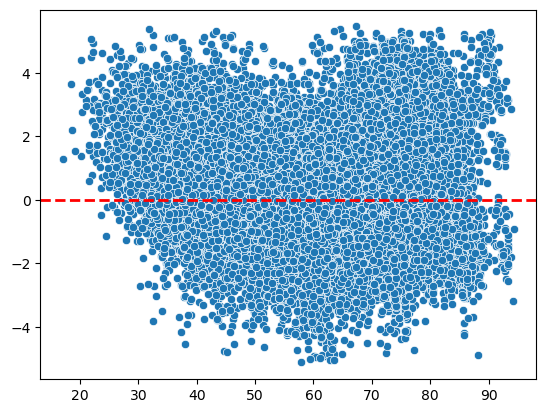

In [126]:
# Plot residual vs fitted values
studentized_residuals = model.get_influence().resid_studentized_internal
ax = sns.scatterplot(x=model.fittedvalues, y=studentized_residuals)
ax.axhline(y=0, color='r', linestyle='--', lw=2)

Now the data points are randomly scattered. So, the heteroscedasticity is removed.

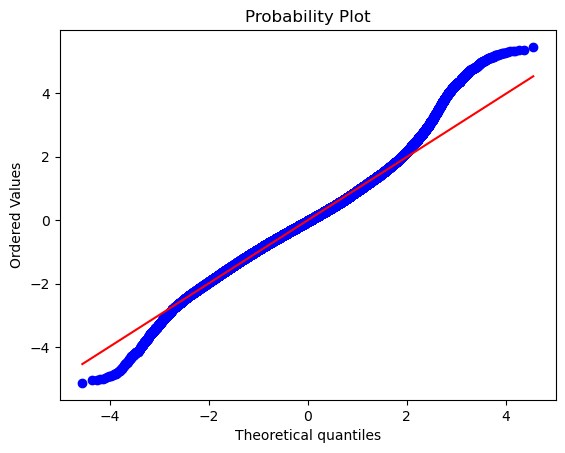

In [127]:
# check for normality of residuals
stats.probplot(studentized_residuals, dist="norm", plot=pylab)
pylab.show()

In [128]:
# check for normality of residuals
from scipy.stats import shapiro
stat, p = shapiro(model.resid)
print('Statistics=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

Statistics=0.987, p=0.000
Probably not Gaussian


c:\ProgramData\Anaconda3\envs\SIE533\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


The normality assumption is still not satisfied. However, we are not going to make any inference here. Our goal is to predict the price of the used cars. So, we will proceed with the model.

## Multicollinearity check

In [129]:
train = pd.concat([X_train_stat, y_train_bc], axis=1)
corr = train.corr()

<AxesSubplot: >

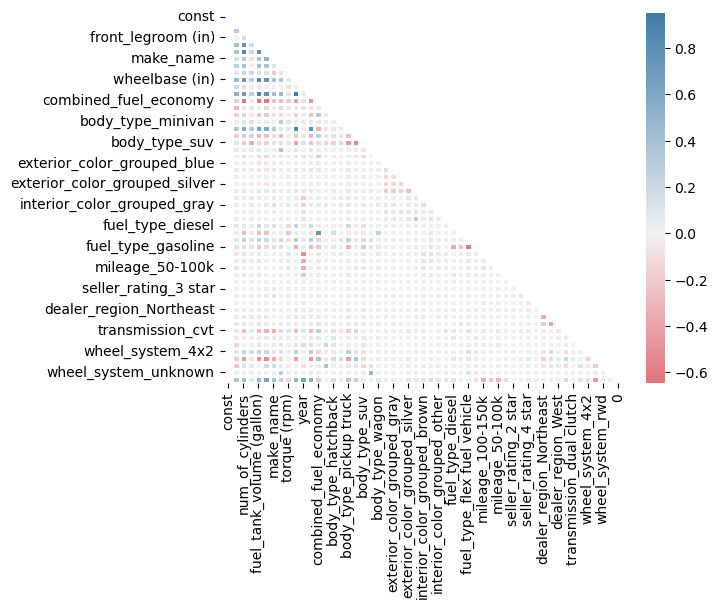

In [130]:
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(h_neg=10, h_pos=240, as_cmap=True)
sns.heatmap(corr, mask=mask,
            center=0, cmap=cmap, linewidths=1,
            annot=False, fmt=".2f")

In [131]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def find_vif(df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i)
                          for i in range(len(df.columns))]
    return vif_data
vif_xtrain = find_vif(X_train_stat)


In [132]:
vif_xtrain[vif_xtrain['VIF'] > 10]

,feature,VIF
0,const,1.349670e+06
9,wheelbase (in),3.508245e+01
11,volume,2.839751e+01
12,combined_fuel_economy,1.184518e+01
16,body_type_pickup truck,4.794785e+01
17,body_type_sedan,5.107253e+01
18,body_type_suv,7.204174e+01


We observe there is some multicollinearity. However, we will check how the model performs if we remove the multicollinear variables.

In [133]:
X_train_copy = X_train_stat.copy()

In [ ]:
high_vif = vif_xtrain[vif_xtrain['VIF'] > 10].sort_values(by='VIF', ascending=False)

In [152]:
while len(high_vif) > 0:
    top_vif = high_vif.iloc[0]['feature']
    X_train_copy = X_train_copy.drop(top_vif, axis=1)
    vif_xtrain= find_vif(X_train_copy)
    high_vif = vif_xtrain[vif_xtrain['VIF'] > 10].sort_values(by='VIF', ascending=False)

In [153]:
vif_xtrain

,feature,VIF
0,horsepower,9.126529
1,torque (rpm),8.175983
2,body_type_coupe,1.326893
3,body_type_hatchback,1.218263
4,body_type_minivan,1.139283
5,body_type_pickup truck,2.213090
6,body_type_sedan,1.881279
7,body_type_van,1.346766
8,body_type_wagon,1.120365
9,exterior_color_grouped_blue,1.373848


In [154]:
vif_xtrain.mean()

C:\Users\apurb\AppData\Local\Temp\ipykernel_22476\1103991933.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  vif_xtrain.mean()


VIF    1.766377
dtype: float64

In [158]:
cols_to_keep = vif_xtrain.loc[:, 'feature'].tolist()
cols_to_drop = X_train_stat.columns.difference(cols_to_keep)

In [ ]:
X_val_copy = X_val_stat.drop(cols_to_drop, axis=1)
X_test_copy = X_test_stat.drop(cols_to_drop, axis=1)

In [165]:
print(X_train_copy.shape, X_val_copy.shape, X_test_copy.shape)

(270949, 39) (67809, 39) (84761, 39)


In [166]:
X_train_copy = sm.add_constant(X_train_copy)
model = sm.OLS(y_train_bc, X_train_copy).fit()

y_pred = model.predict(sm.add_constant(X_val_copy))

y_val_bc = boxcox(y_val, lam)

from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_val_bc, y_pred)
print('MAPE: ', mape)
accuracy = 100 - mape * 100
print('Accuracy: ', accuracy)

MAPE:  0.09170617471435022
Accuracy:  90.82938252856498


In [167]:
y_pred = model.predict(sm.add_constant(X_test_copy))

y_test_bc = boxcox(y_test, lam)

from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test_bc, y_pred)
print('Test MAPE: ', mape)
accuracy = 100 - mape * 100
print('Test Accuracy: ', accuracy)

Test MAPE:  0.09120185257457984
Test Accuracy:  90.87981474254201


So, removing multicollinear variables does not improve the model performance. As we don't plan to make any inference and multicollinearity does not affect the prediction, we will proceed with all the variables. We will now train the final model.

In [168]:
final_model = sm.OLS(y_train_bc, X_train_stat).fit()

y_pred = final_model.predict(X_test_stat)

y_test_bc = boxcox(y_test, lam)

from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test_bc, y_pred)
print('MAPE: ', mape)
accuracy = 100 - mape * 100
print('Accuracy: ', accuracy)

MAPE:  0.05274174881138691
Accuracy:  94.72582511886131


## Serialize the model

In [169]:
import pickle

In [170]:
pickle.dump(final_model, open('model.pkl', 'wb'))